In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [12]:
class Bandit:
    def __init__(self, m, upper_limit=0):
        self.mean = upper_limit
        self.m = m
        self.N = 0
        
    def pull(self):
        return self.m + np.random.randn()
    
    def update_mean(self, X_N):
        self.N += 1
        self.mean = (1 - 1./self.N)*self.mean + 1./self.N*X_N

In [22]:
m1 = 1
m2 = 2
m3 = 3

In [23]:
#define number of trials
N = 1000

#define upper_limit
upper_limit = 10

#define eps
eps = 0.1

#define list of m
list_of_m = [m1, m2, m3]

In [24]:
def ucb(mean, N, N_j):
    if N_j == 0:
        N_j = N_j + 1e-3
    return mean + np.sqrt(2 * np.log(N) / N_j)

In [29]:
def run_experiment(list_of_m, upper_limit, N):
    
    list_of_bandits = [Bandit(m) for m in list_of_m]
    list_of_selected_bandits = []
    pulled_data = np.empty(N)
    
    for i in range(0, N):
        
        best_bandit_arg = np.argmax([ucb(bandit.mean, i, bandit.N) for bandit in list_of_bandits])
        selected_bandit = list_of_bandits[best_bandit_arg]

        #pull randomly selected bandit
        pulled_value = selected_bandit.pull()

        #update bandit mean
        selected_bandit.update_mean(pulled_value)
        
        #store pulled data
        pulled_data[i] = pulled_value
        
        #update list of selected bandits
        list_of_selected_bandits.append(selected_bandit)


        
    cumulative_average = np.cumsum(pulled_data) / (np.arange(N) + 1)
    
    return list_of_selected_bandits, cumulative_average


In [30]:
list_of_selected_bandits, cumulative_average = run_experiment(list_of_m, upper_limit, N)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


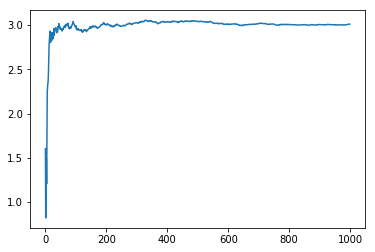

In [31]:
plt.plot(cumulative_average)

In [32]:
def run_experiment_exp(list_of_m, eps, N):
    
    list_of_bandits = [Bandit(m) for m in list_of_m]
    list_of_selected_bandits = []
    pulled_data = np.empty(N)
    
    for i in range(0, N):

        #pulling random uniform number
        p = np.random.random()

        if p < eps:
            #select random bandit
            selected_bandit = np.random.choice(list_of_bandits)
        else:
            #select current best bandit
            best_bandit_arg = np.argmax([bandit.mean for bandit in list_of_bandits])
            selected_bandit = list_of_bandits[best_bandit_arg]

        #pull randomly selected bandit
        pulled_value = selected_bandit.pull()

        #update bandit mean
        selected_bandit.update_mean(pulled_value)
        
        #store pulled data
        pulled_data[i] = pulled_value
        
        #update list of selected bandits
        list_of_selected_bandits.append(selected_bandit)

        
    cumulative_average = np.cumsum(pulled_data) / (np.arange(N) + 1)
    
    return list_of_selected_bandits, cumulative_average


In [33]:
list_of_selected_bandits_exp, cumulative_average_exp = run_experiment_exp(list_of_m, eps, N)

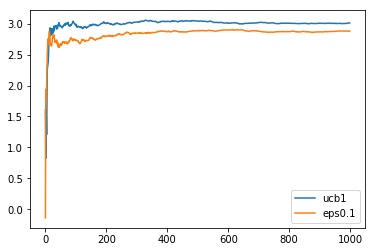

In [34]:
plt.plot(cumulative_average, label = "ucb1")
plt.plot(cumulative_average_exp, label = "eps0.1")
plt.legend()